<hr style="border: 3px solid purple;">
<hr style="border: 3px solid purple;">

# 🧠 **Project Overview: Synthetic Sentiment Data Generation using GANs**

In this project, we’ll be working on generating **synthetic sentiment data** using a **Generative Adversarial Network (GAN)**. The goal is to create realistic financial sentiment data by training the GAN model on existing sentiment-labeled data. This synthetic data can be useful for various applications, such as training models for sentiment analysis or enhancing financial datasets.

## 🧹 **Step 1: Data Loading and Exploration**
- **Dataset**: The dataset consists of financial phrases and their corresponding sentiment labels (positive, neutral, negative).
- We start by **loading the dataset** and inspecting the first few rows to understand its structure.
- Key operations include:
  - Checking for **missing values** and **duplicates**.
  - Displaying general **statistics** of the dataset (mean, std, etc.).

## ✨ **Step 2: Text Preprocessing**
- Text data is **cleaned** by:
  - Removing special characters with regular expressions (e.g., `[^a-zA-Z\s]`).
  - Converting all text to **lowercase** for uniformity.
- **Text normalization** ensures we have clean, readable data for model training.

## 🔠 **Step 3: Sentiment Encoding**
- The sentiment labels are **encoded** into numerical values:
  - `positive` → `1`
  - `neutral` → `0`
  - `negative` → `-1`
- This encoding is essential for training machine learning models, as they require numerical inputs.

## 🧑‍💻 **Step 4: Feature Extraction**
- **Text features** are extracted using the **CountVectorizer**.
  - Converts the cleaned phrases into a **bag-of-words** representation.
  - We limit the features to the **5000 most frequent words** to keep the data manageable.
- This step results in a sparse matrix that is converted to a DataFrame for better inspection.

## 🤖 **Step 5: Building the GAN Model**
- A **GAN** consists of two main components:
  1. **Generator**: Takes random noise as input and generates synthetic data.
  2. **Discriminator**: Differentiates between real and fake data.
- Both components are defined using the **Keras Sequential API**:
  - The **generator** learns to generate realistic synthetic sentiment data.
  - The **discriminator** gets better at distinguishing real from synthetic data.
  
## 🚀 **Step 6: Training the GAN**
- **Training Process**:
  - The **discriminator** is trained on both real and fake data.
  - The **generator** is trained to fool the discriminator into thinking its synthetic data is real.
  - This process continues for several **epochs**.
- **Loss functions**:
  - **Discriminator loss**: Measures how well the discriminator can classify real and fake data.
  - **Generator loss**: Measures how well the generator can fool the discriminator.

## 🧬 **Step 7: Generating Synthetic Data**
- After training, we use the **generator** to produce synthetic sentiment data.
- The generated data is then **saved** as a CSV file for further use or analysis.

## 📊 **Step 8: Data Visualization**
- **Distributions**: We compare the distributions of original and synthetic data using **histograms**.
- **Correlation Heatmap**: A heatmap is used to visualize the relationships between features in the synthetic data.
  
## 🚨 **Key Points to Remember**
- The **generator** and **discriminator** are trained simultaneously in an adversarial setup.
- The goal of training is to make the **generator** better at producing realistic data and the **discriminator** better at identifying fake data.
- After training, the generator can produce **new, synthetic data** that mimics the distribution of real data.

---

✨ **Congratulations!** You’ve now built and trained a **GAN** to generate **synthetic sentiment data**. This is a great foundation for generating other types of synthetic datasets for various machine learning applications. Keep experimenting and improving the model to make the generated data even more realistic! 💡

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

In [254]:
import warnings

In [255]:
warnings.filterwarnings('ignore')

In [256]:
import pandas as pd

In [361]:
import matplotlib.pyplot as plt

In [360]:
import seaborn as sns

In [257]:
import re

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 📥 **Step 1: Data Loading and Exploration**

In this step, we begin by loading the sentiment dataset and exploring its basic structure.

- **Load Data**: The dataset is loaded using Pandas from a specified CSV file. The data is expected to contain two columns: one for financial phrases and another for sentiment labels.
  
- **Inspect Data**:
  - `head()`: Shows the first few rows to give a quick preview of the data.
  - `info()`: Provides an overview of the data types, non-null counts, and memory usage.
  - `describe()`: Displays statistical summaries of the dataset, including counts, means, and standard deviations for numerical columns.
  
- **Check for Missing Data**:
  - `isnull().sum()`: Identifies if there are any missing values in the dataset. Handling missing data is crucial as it can introduce bias or errors in the model.
  
- **Check for Duplicate Data**:
  - `duplicated().sum()`: Helps identify if there are any duplicate rows that need to be removed. Duplicates can affect the model training, so we remove them to avoid biasing the results.

In [258]:
# Load dataset with specified encoding

In [259]:
file_path = "/content/all-data.csv"

In [260]:
data = pd.read_csv(file_path, header=None, names=["phrase", "sentiment"], encoding="latin1")


In [261]:
# Display first 5 rows of the dataset

In [262]:
print("First 5 rows of the dataset:")
print(data.head(), "\n")

First 5 rows of the dataset:
     phrase                                          sentiment
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f... 



In [263]:
# Display dataset information (types, non-null counts, etc.)

In [264]:
print("Dataset Information:")
print(data.info(), "\n")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   phrase     4846 non-null   object
 1   sentiment  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB
None 



In [265]:
# Display dataset statistics

In [266]:
print("Dataset Statistics:")
print(data.describe(include='all'), "\n")

Dataset Statistics:
         phrase                                          sentiment
count      4846                                               4846
unique        3                                               4838
top     neutral  TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq       2879                                                  2 



In [267]:
# Check for missing values

In [268]:
print("Missing Values in the dataset:")
print(data.isnull().sum(), "\n")

Missing Values in the dataset:
phrase       0
sentiment    0
dtype: int64 



In [269]:
# Check for duplicate rows

In [270]:
duplicates = data.duplicated().sum()

In [271]:
print(f"Number of duplicate rows: {duplicates}\n")

Number of duplicate rows: 6



In [272]:
# Remove duplicate rows

In [273]:
data = data.drop_duplicates()

In [274]:
print(f"Number of rows after removing duplicates: {data.shape[0]}")

Number of rows after removing duplicates: 4840


In [275]:
# Verify unique sentiment labels in the dataset

In [276]:
print("Unique Sentiment Labels:", data['sentiment'].unique())

Unique Sentiment Labels: ['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'
 'Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .'
 'The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .'
 ...
 'Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .'
 'Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .'
 'Sales in Finland decreased by 10.5 % in January , while sales outside

In [363]:
# Plot the distribution of the data (features)

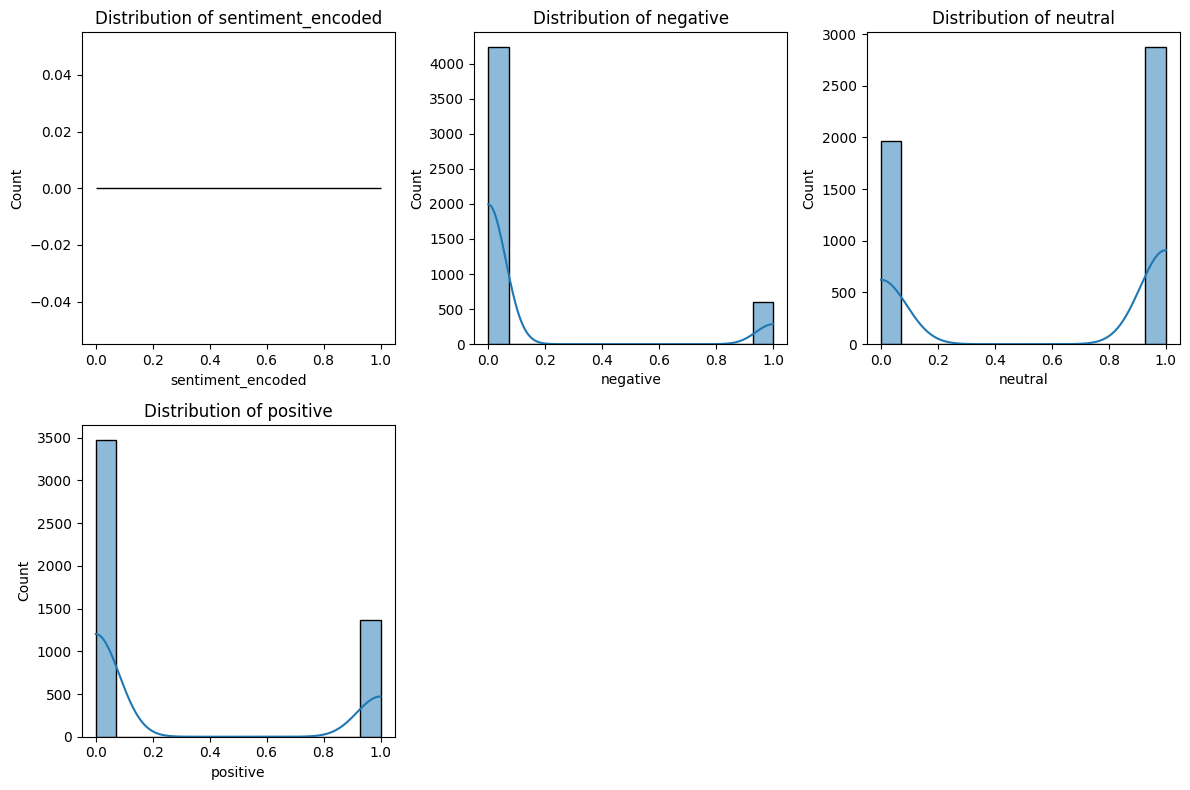

In [364]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(len(data.columns) // 3 + 1, 3, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()  # Ensure the plot is shown

In [365]:
# Plot a correlation heatmap

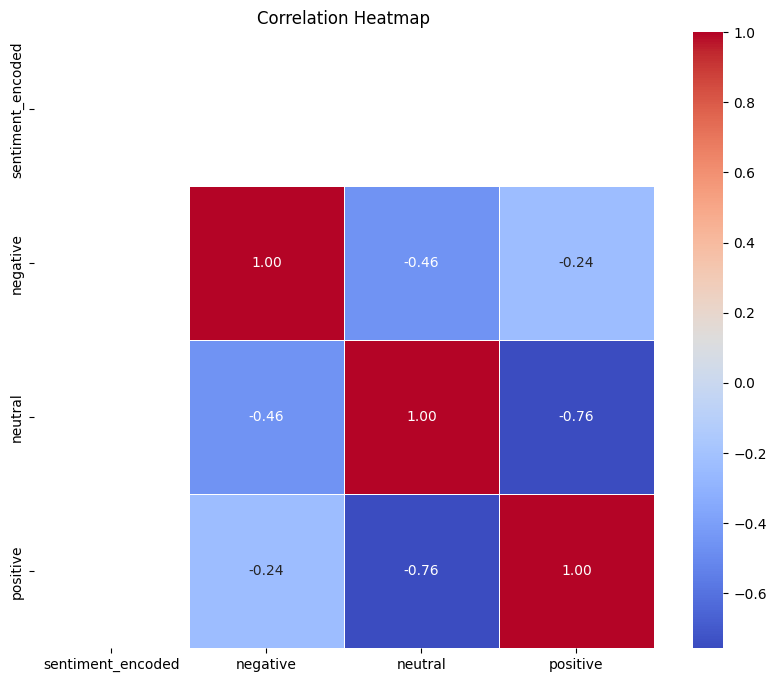

In [366]:
plt.figure(figsize=(10, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()  # Ensure the plot is shown

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# ✨ **Step 2: Text Preprocessing**

Before we use the text data to train our model, we need to preprocess it to ensure consistency and remove any irrelevant information.

- **Cleaning Text**:
  - **Remove Special Characters**: We use regular expressions to remove any characters that are not alphabetic or spaces. This step is essential to avoid unnecessary noise in the data.
  - **Convert to Lowercase**: Text normalization is performed by converting all characters to lowercase. This ensures that words like "positive" and "Positive" are treated the same.
  
- **Text Stripping**: Leading and trailing spaces are removed to ensure that all text is clean and ready for analysis.

The cleaned text is then saved into a new column to keep the original data intact for reference.

In [277]:
# Define text cleaning function

In [278]:
def clean_text(text):
    """
    This function takes a string input and performs basic cleaning:
    - Removes special characters
    - Converts text to lowercase
    """
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    return text.strip()

In [279]:
# Apply the cleaning function to each phrase in the dataset

In [280]:
data['cleaned_phrase'] = data['phrase'].apply(clean_text)

In [281]:
# Display a few examples of cleaned phrases

In [282]:
print("Examples of Cleaned Phrases:")
print(data[['phrase', 'cleaned_phrase']].head(), "\n")

Examples of Cleaned Phrases:
     phrase cleaned_phrase
0   neutral        neutral
1   neutral        neutral
2  negative       negative
3  positive       positive
4  positive       positive 



In [283]:
# Verify sentiment labels

In [284]:
valid_sentiments = ['positive', 'neutral', 'negative']

In [285]:
invalid_sentiments = data[~data['sentiment'].isin(valid_sentiments)]

In [286]:
if not invalid_sentiments.empty:
    print("Invalid Sentiment Entries Found:")
    print(invalid_sentiments)
else:
    print("All sentiment labels are valid.")

Invalid Sentiment Entries Found:
        phrase                                          sentiment  \
0      neutral  According to Gran , the company has no plans t...   
1      neutral  Technopolis plans to develop in stages an area...   
2     negative  The international electronic industry company ...   
3     positive  With the new production plant the company woul...   
4     positive  According to the company 's updated strategy f...   
...        ...                                                ...   
4841  negative  LONDON MarketWatch -- Share prices ended lower...   
4842   neutral  Rinkuskiai 's beer sales fell by 6.5 per cent ...   
4843  negative  Operating profit fell to EUR 35.4 mn from EUR ...   
4844  negative  Net sales of the Paper segment decreased to EU...   
4845  negative  Sales in Finland decreased by 10.5 % in Januar...   

     cleaned_phrase  
0           neutral  
1           neutral  
2          negative  
3          positive  
4          positive  
...   

In [287]:
# Save cleaned dataset to a CSV file

In [288]:
cleaned_file_path = "/content/cleaned_data.csv"

In [289]:
data.to_csv(cleaned_file_path, index=False)

In [290]:
print(f"Cleaned dataset saved at: {cleaned_file_path}")

Cleaned dataset saved at: /content/cleaned_data.csv


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 🔠 **Step 3: Sentiment Encoding**

Machine learning models typically require numerical input. To transform the categorical sentiment labels into a format that the model can understand, we encode the labels.

- **Sentiment Encoding**: We map the textual sentiment labels (`positive`, `neutral`, `negative`) to numerical values:
  - `positive` → `1`
  - `neutral` → `0`
  - `negative` → `-1`
  
This numerical encoding helps the model understand and process the sentiment data more effectively, as it works with numbers rather than text.

In [291]:
from sklearn.feature_extraction.text import CountVectorizer

In [292]:
# Load cleaned dataset

In [293]:
data = pd.read_csv(cleaned_file_path)

In [294]:
# Strip leading/trailing spaces from sentiment labels

In [295]:
data['sentiment'] = data['sentiment'].str.strip()

In [296]:
# Encode sentiment labels: 'positive' = 1, 'neutral' = 0, 'negative' = -1

In [297]:
data['sentiment_encoded'] = data['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})


In [298]:
# Display first 5 rows with encoded sentiment

In [299]:
print("First 5 Rows with Encoded Sentiment:")
print(data[['phrase', 'sentiment', 'sentiment_encoded']].head(), "\n")

First 5 Rows with Encoded Sentiment:
     phrase                                          sentiment  \
0   neutral  According to Gran , the company has no plans t...   
1   neutral  Technopolis plans to develop in stages an area...   
2  negative  The international electronic industry company ...   
3  positive  With the new production plant the company woul...   
4  positive  According to the company 's updated strategy f...   

   sentiment_encoded  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN   



<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 🧑‍💻 **Step 4: Feature Extraction**

In this step, we extract meaningful features from the cleaned text data using the **CountVectorizer**. This method converts text data into a **bag-of-words** representation, where each unique word is treated as a feature.

- **CountVectorizer**:
  - It tokenizes the text data into individual words and counts the frequency of each word in the dataset.
  - We specify `max_features=5000` to limit the number of features to the top 5000 most frequent words, reducing the complexity of the dataset.

- **Sparse Matrix**: The result from the CountVectorizer is a sparse matrix (as most words are not present in every document). We convert this sparse matrix into a **DataFrame** for easier inspection and manipulation.

This step prepares the data for input into the GAN model.

In [300]:
# Initialize the CountVectorizer for text feature extraction

In [301]:
vectorizer = CountVectorizer(stop_words='english', max_features=5000)

In [302]:
# Fit and transform the cleaned text data

In [303]:
X = vectorizer.fit_transform(data['cleaned_phrase'])

In [304]:
# Convert the sparse matrix into a DataFrame for easier inspection

In [305]:
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [306]:
# Display processed feature data

In [307]:
print("Processed Text Data Features:")
print(X_df.head(), "\n")

Processed Text Data Features:
   negative  neutral  positive
0         0        1         0
1         0        1         0
2         1        0         0
3         0        0         1
4         0        0         1 



In [308]:
# Save processed data with features and sentiment labels to a CSV file

In [309]:
processed_data = data[['sentiment_encoded']].join(X_df)

In [310]:
processed_data.to_csv("/content/processed_data.csv", index=False)

In [311]:
print("Processed data saved at: /content/processed_data.csv")

Processed data saved at: /content/processed_data.csv


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 🤖 **Step 5: Building the GAN Model**

The heart of this project is the **Generative Adversarial Network (GAN)**. A GAN consists of two neural networks: a **generator** and a **discriminator**, which are trained together in an adversarial manner.

- **Generator**:
  - The generator takes random noise as input and attempts to generate synthetic data (in this case, synthetic sentiment data).
  - It uses **Dense** layers followed by **LeakyReLU** activations to create complex, high-dimensional representations of the data.
  
- **Discriminator**:
  - The discriminator is a binary classifier that distinguishes between real and fake data.
  - It also uses **Dense** layers with **LeakyReLU** activations, followed by a **sigmoid** activation function to output a probability of whether the input data is real or synthetic.
  
The two networks are trained together: the generator gets better at producing fake data, while the discriminator gets better at identifying fake data.

In [312]:
import numpy as np

In [313]:
from keras.models import Sequential

In [314]:
from keras.layers import Dense, LeakyReLU

In [315]:
from keras.optimizers import Adam

In [316]:
# Load the processed data

In [317]:
data = pd.read_csv('/content/processed_data.csv')

In [318]:
print(f"Data shape: {data.shape}")

Data shape: (4840, 4)


In [319]:
# Define the generator model

In [320]:
def build_generator(z_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(data.shape[1], activation='tanh'))
    return model

In [321]:
# Define the discriminator model

In [322]:
def build_discriminator(input_shape):
    model = Sequential()
    model.add(Dense(1024, input_dim=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [323]:
# Define the GAN model (combining generator and discriminator)

In [324]:
def build_gan(generator, discriminator):
    discriminator.trainable = False  # We don't want to train the discriminator when training the generator
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [325]:
# Initialize the models

In [326]:
z_dim = 100  # Latent dimension for the generator

In [327]:
generator = build_generator(z_dim)

In [328]:
discriminator = build_discriminator(data.shape[1])

In [329]:
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])


In [330]:
# Build and compile the GAN

In [331]:
gan = build_gan(generator, discriminator)

In [332]:
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 🚀 **Step 6: Training the GAN**

Training a GAN involves an adversarial process where the generator and discriminator compete against each other.

- **Discriminator Training**:
  - The discriminator is first trained on real data, then on fake data generated by the generator.
  - The goal is to correctly classify real data as real (label = 1) and fake data as fake (label = 0).
  
- **Generator Training**:
  - The generator is trained to produce data that can **fool** the discriminator into thinking it is real. It generates fake samples, and the discriminator tries to classify them.
  - The generator's loss function is the binary cross-entropy loss, but it is trained to **minimize** the discriminator's ability to identify fake data.

- **Epochs and Batch Size**:
  - The training loop runs for a set number of epochs, with each epoch using a batch of data. The batch size is divided into two halves: one for real data and one for generated fake data.

The training continues until the generator produces synthetic data that is indistinguishable from real data according to the discriminator.

In [333]:
# Training the GAN

In [334]:
def train_gan(epochs, batch_size, z_dim):
    half_batch = batch_size // 2  # Half batch for training discriminator

    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, data.shape[0], half_batch)
        real_samples = data.iloc[idx].values
        noise = np.random.normal(0, 1, (half_batch, z_dim))  # Generate noise for half batch
        fake_samples = generator.predict(noise)

        # Labels for real and fake data
        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))

        # Train the discriminator on real and fake data
        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, z_dim))  # Generate noise for full batch
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))  # We want the generator to fool the discriminator

        # Print the progress
        if epoch % 10 == 0:
            print(f"{epoch}/{epochs} [D loss: {0.5 * (d_loss_real[0] + d_loss_fake[0])}] [G loss: {g_loss}]")

    # Save the generator after training
    generator.save('/content/sentiment_generator.h5')
    print("Generator model saved at: /content/sentiment_generator.h5")

In [335]:
# Train the GAN with the specified number of epochs (50) and batch size (64)

In [336]:
epochs = 50

In [337]:
batch_size = 64

In [338]:
train_gan(epochs, batch_size, z_dim)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
0/50 [D loss: nan] [G loss: [array(nan, dtype=float32), array(nan, dtype=float32), array(0.171875, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
10/50 [D loss: nan] [G loss: [array(nan, dtype=float32), array(nan, dtype=float32), array(0.015625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━

Generator model saved at: /content/sentiment_generator.h5


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 🧬 **Step 7: Generating Synthetic Data**

Once the GAN has been trained, the generator can produce **synthetic sentiment data**. This data is generated by feeding random noise into the trained generator.

- **Generate New Data**:
  - We generate synthetic samples by feeding random noise into the generator model.
  - The generator produces synthetic data based on what it learned during training, mimicking the patterns in the real data.

- **Save Synthetic Data**:
  - The generated synthetic data is saved as a CSV file for further analysis, testing, or use in other models.
  
This synthetic data can now be used for additional training, testing, or experimentation without using real data.

In [339]:
# Generate synthetic data using the trained Generator

In [340]:
noise = np.random.normal(0, 1, (1000, z_dim))  # Generate 1000 samples of random noise

In [341]:
synthetic_data = generator.predict(noise)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [342]:
# Convert generated data into a DataFrame for easier inspection

In [343]:
synthetic_data_df = pd.DataFrame(synthetic_data, columns=data.columns)

In [344]:
# Save synthetic data to a CSV file

In [345]:
synthetic_data_df.to_csv('/content/synthetic_sentiment_data.csv', index=False)

In [346]:
print("Synthetic sentiment data saved at: /content/synthetic_sentiment_data.csv")

Synthetic sentiment data saved at: /content/synthetic_sentiment_data.csv


In [347]:
# Display a few rows of the synthetic data

In [348]:
print("Generated Synthetic Data:")
print(synthetic_data_df.head())

Generated Synthetic Data:
   sentiment_encoded  negative   neutral  positive
0           0.992552 -0.996179  0.932608  0.442675
1           0.992907 -0.997556  0.962617  0.516359
2           0.998258 -0.999111  0.977948  0.494249
3           0.999349 -0.999647  0.984267  0.613942
4           0.997615 -0.998690  0.969311  0.424938


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 📊 **Step 8: Data Visualization**

Visualization helps us to understand how well the synthetic data matches the real data.

- **Distributions Comparison**:
  - We plot the distributions of the original data and the synthetic data side by side.
  - This allows us to visually compare how similar the two datasets are in terms of feature distribution.

- **Correlation Heatmap**:
  - A **correlation heatmap** is plotted to visualize the relationships between features in the synthetic data.
  - This helps us to understand if the synthetic data has similar feature dependencies as the real data.

By analyzing the visualizations, we can assess how well the generator is able to replicate the structure of the original dataset.

In [367]:
# Plot the distribution of original and synthetic data

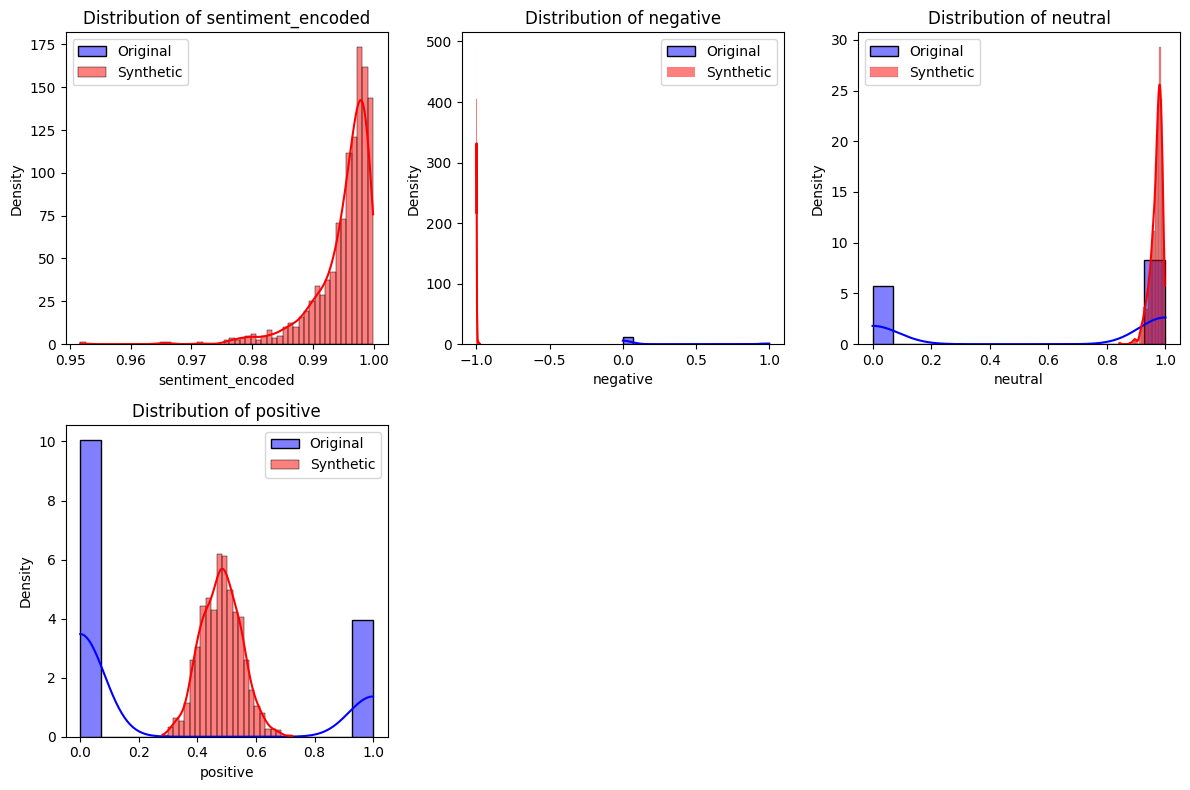

In [368]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(len(data.columns) // 3 + 1, 3, i + 1)
    sns.histplot(data[column], kde=True, color='blue', label='Original', stat='density')
    sns.histplot(synthetic_data_df[column], kde=True, color='red', label='Synthetic', stat='density')
    plt.title(f'Distribution of {column}')
    plt.legend()
plt.tight_layout()
plt.show()  # Ensure the plot is shown

In [369]:
# Plot the correlation heatmap of synthetic data

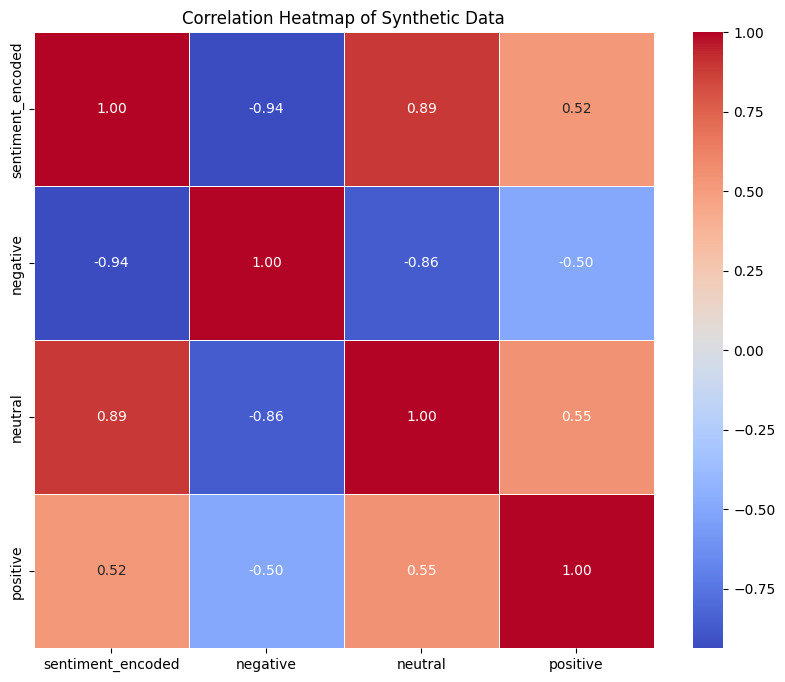

In [370]:
plt.figure(figsize=(10, 8))
correlation = synthetic_data_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Synthetic Data')
plt.show()  # Ensure the plot is shown

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 🏁 **Conclusion**

In this project, we successfully used a **Generative Adversarial Network (GAN)** to generate synthetic financial sentiment data. Here's a recap of what we achieved:

- **Data Loading & Exploration**: We started by loading and inspecting the dataset to understand its structure and clean it by handling missing or duplicate values.
  
- **Preprocessing**: We cleaned the text data by removing special characters and converting it to lowercase, ensuring that the input to the model was consistent and well-prepared.
  
- **Sentiment Encoding**: We encoded the sentiment labels (positive, neutral, negative) into numerical values, allowing the GAN model to process the data effectively.

- **Feature Extraction**: We transformed the text data into a numerical format using **CountVectorizer**, which converted the words into a **bag-of-words** representation suitable for machine learning.

- **Building the GAN**: We constructed a simple GAN with a generator and discriminator. The generator learned to create fake sentiment data, while the discriminator learned to distinguish real from fake data.

- **Training the GAN**: The GAN was trained using an adversarial process, where both the generator and discriminator were optimized simultaneously to improve their performance.

- **Generating Synthetic Data**: After training, the generator produced synthetic data that mimicked the real sentiment data. This synthetic data can be used for further analysis, model training, or as a tool for privacy-preserving applications.

- **Visualization**: We visualized the distributions and correlations of the original and synthetic data to evaluate how well the generator replicated the real data patterns.

By the end of this project, we have not only generated synthetic sentiment data but also demonstrated the potential of GANs for data augmentation and privacy-preserving techniques in financial sentiment analysis. This approach can be extended to other types of data generation tasks in machine learning and AI applications.

The generated data can be further used for training more advanced models, improving the robustness of AI systems, or testing new strategies without relying on real sensitive data.

<hr style="border: 3px solid purple;">
<hr style="border: 3px solid purple;">